In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("fab1_dotsize.csv")
df

,date,strain,number,time,image,z-stack,area
0,130624,1287,1,120,50,1,3
1,130624,1287,1,120,50,1,17
2,130624,1287,1,120,50,2,83
3,130624,1287,1,120,50,4,16
4,130624,1287,1,120,50,6,31
...,...,...,...,...,...,...,...
358,190624,1290,3,120,59,12,45
359,190624,1290,3,120,59,12,29
360,190624,1290,3,120,59,12,6
361,190624,1290,3,120,59,12,26


In [3]:
# calculate the mean area for each strain and biological replicate
df_mean = df.groupby(['strain', 'number'], as_index=False)['area'].mean()
df_mean

,strain,number,area
0,1287,1,25.607143
1,1287,2,21.000000
2,1287,3,22.567568
3,1290,1,37.737705
4,1290,2,33.944954
5,1290,3,36.351648


In [4]:
# calculate sem and mean for each strain
df_error = df.groupby('strain', as_index=False)['area'].mean()
df_error['sem'] = df_mean.groupby(['strain'])['area'].std().values / np.sqrt(3)
df_error

,strain,area,sem
0,1287,22.833333,1.352406
1,1290,35.670498,1.108008


## t-test (paired, two-tailed)

In [5]:
wt_area = df_mean[df_mean["strain"] == 1287]["area"]
fab16d_area = df_mean[df_mean["strain"] == 1290]["area"]
statistic, fab16d_pvalue = stats.ttest_rel(wt_area, fab16d_area)
fab16d_pvalue

0.0013552883806840959

In [6]:
# significant

## data visualization

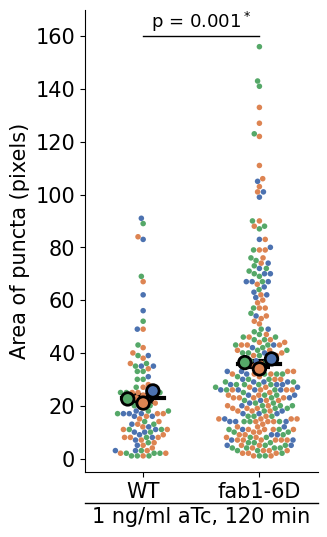

In [26]:
fontsize=15
fig, ax = plt.subplots(figsize = (3, 6), dpi=100)
ax1 = sns.swarmplot(x="strain", y="area", data=df, hue='number', size=4, palette='deep')
ax2 = sns.swarmplot(x='strain', y='area', data=df_mean,\
                    hue='number', size=9, palette='deep', edgecolor='k', linewidth=2)
ax.errorbar(x=[0, 1], y='area', yerr='sem', data=df_error,\
            capsize=8, fmt=' ', ecolor='k', capthick=3,\
            )
# horizontal line for the mean (somehow could not change by ax.errorbar)
diff = 0.18
ax.plot([0-diff, 0+diff], [df_error['area'].iloc[0], df_error['area'].iloc[0]], lw=3, color='k')
ax.plot([1-diff, 1+diff], [df_error['area'].iloc[1], df_error['area'].iloc[1]], lw=3, color='k')
# setting of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# setting of x axis
ax.set_xlim(-0.5, 1.5)
ax.set_xlabel("1 ng/ml aTc, 120 min", fontsize=fontsize)
ax.set_xticks([0, 1])
ax.set_xticklabels(["WT", "fab1-6D"], fontsize=fontsize)
# setting of y axis
ax.set_ylim(-5, 170)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140, 160])
ax.set_yticklabels(["0", "20", "40", "60", "80", "100", "120", "140", "160"], fontsize=fontsize)
ax.set_ylabel("Area of puncta (pixels)", fontsize=fontsize)
# add p value
y=160
ax.plot([0, 1], [y, y], lw=1, color='k')
ax.text(0.5, y+3, f"p = {fab16d_pvalue:.3f}$^*$", ha="center", fontsize=fontsize-2)
y2 = -17
ax.plot([-0.5, 1.5], [y2, y2], lw=1, color='k', clip_on=False)

ax.legend().remove()
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()